# Milestone Project 1: Food Vision Big

## Check GPU

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1650 Ti (UUID: GPU-ff183205-244d-e5aa-6214-59c049bddd64)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-23 23:11:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10,01K  --.-KB/s    in 0,02s   

2024-04-23 23:11:21 (556 KB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

2024-04-23 23:11:22.600703: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Use TensorFlow Datasets to download data

In [4]:
# Get TensorfFlow datasets
import tensorflow_datasets as tfds

In [ ]:
datasets_list = tfds.list_builders() # all avalilable datasets
# print("food101" in datasets_list)

In [6]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(
  "food101",
  split=["train", "validation"],
  shuffle_files=True,
  as_supervised=True, # data gets returned in tuple format
  with_info=True,
)

2024-04-23 23:21:21.360056: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-04-23 23:21:21.360081: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: asus
2024-04-23 23:21:21.360085: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: asus
2024-04-23 23:21:21.360246: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.67.0
2024-04-23 23:21:21.360262: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.67.0
2024-04-23 23:21:21.360265: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.67.0


In [29]:
# Features of Food101 from TFDS
ds_info.features, ds_info.splits

(FeaturesDict({
     'image': Image(shape=(None, None, 3), dtype=uint8),
     'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
 }),
 {'train': <SplitInfo num_examples=75750, num_shards=32>,
  'validation': <SplitInfo num_examples=25250, num_shards=16>})

In [30]:
tfds.as_dataframe(train_data.take(4), ds_info)

ValueError: HTML formatting of column image failed:
 * feature: Image(shape=(None, None, 3), dtype=uint8)
 * input: array([[[[1.35204077e+00, 1.35204077e+00, 1.35204077e+00],
         [6.46938801e+00, 6.46938801e+00, 6.46938801e+00],
         [1.00306120e+01, 1.00306120e+01, 1.00306120e+01],
         ...,
         [6.78570557e+00, 7.78570557e+00, 0.00000000e+00],
         [6.00000000e+00, 7.00000000e+00, 0.00000000e+00],
         [6.00000000e+00, 7.00000000e+00, 0.00000000e+00]],

        [[9.54081833e-01, 9.54081833e-01, 9.54081833e-01],
         [1.08163238e+00, 1.08163238e+00, 1.08163238e+00],
         [5.31122255e+00, 5.31122255e+00, 5.31122255e+00],
         ...,
         [6.98469353e+00, 7.98469353e+00, 1.57141113e+00],
         [6.06631041e+00, 7.06631041e+00, 0.00000000e+00],
         [6.00000000e+00, 7.00000000e+00, 0.00000000e+00]],

        [[1.37755185e-01, 1.37755185e-01, 1.37755185e-01],
         [7.29591727e-01, 7.29591727e-01, 7.29591727e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [7.04592037e+00, 8.04592037e+00, 1.70917189e+00],
         [8.14287472e+00, 9.14287472e+00, 1.57144642e+00],
         [8.93367004e+00, 9.93367004e+00, 1.93367028e+00]],

        ...,

        [[1.15152740e+02, 7.01527405e+01, 2.91527405e+01],
         [1.14887337e+02, 6.98873367e+01, 2.88873367e+01],
         [1.11713829e+02, 6.67138290e+01, 2.55454788e+01],
         ...,
         [2.00571442e+02, 2.06357147e+02, 2.07000031e+02],
         [1.98857147e+02, 2.03857147e+02, 2.06857147e+02],
         [1.97280624e+02, 2.02280624e+02, 2.05280624e+02]],

        [[1.36096954e+02, 9.10969543e+01, 5.00969582e+01],
         [1.35219437e+02, 9.02194443e+01, 4.92194405e+01],
         [1.33683746e+02, 8.86837616e+01, 4.76837616e+01],
         ...,
         [2.01770401e+02, 2.07556107e+02, 2.08198990e+02],
         [1.99137726e+02, 2.04137726e+02, 2.07137726e+02],
         [1.97357147e+02, 2.02357147e+02, 2.05357147e+02]],

        [[1.31729340e+02, 8.67293320e+01, 4.77293358e+01],
         [1.34285431e+02, 8.92854385e+01, 4.82854347e+01],
         [1.37208939e+02, 9.22089310e+01, 5.12089310e+01],
         ...,
         [2.00785706e+02, 2.06571411e+02, 2.07214294e+02],
         [1.98142822e+02, 2.03142822e+02, 2.06142822e+02],
         [1.96357147e+02, 2.01357147e+02, 2.04357147e+02]]],


       [[[6.29776764e+01, 2.97767830e+00, 0.00000000e+00],
         [7.38258972e+01, 1.08258944e+01, 3.88424850e+00],
         [6.76839905e+01, 5.11256361e+00, 5.41135311e-01],
         ...,
         [6.63277283e+01, 1.26778193e+01, 1.14469123e+00],
         [6.41386719e+01, 8.13866997e+00, 0.00000000e+00],
         [6.27143555e+01, 4.71435547e+00, 0.00000000e+00]],

        [[6.58207932e+01, 6.91900444e+00, 1.96109638e-01],
         [7.40545273e+01, 1.27018509e+01, 5.15274382e+00],
         [7.02410660e+01, 7.66964245e+00, 3.09821415e+00],
         ...,
         [7.16840057e+01, 1.60366879e+01, 4.58579397e+00],
         [6.83420792e+01, 1.12438669e+01, 1.01975596e+00],
         [6.30673332e+01, 3.96911955e+00, 0.00000000e+00]],

        [[6.55545273e+01, 7.55452728e+00, 3.57142806e-01],
         [7.08912659e+01, 1.08912640e+01, 3.02200294e+00],
         [7.06198959e+01, 9.48660660e+00, 4.91517878e+00],
         ...,
         [7.65144730e+01, 1.95144749e+01, 8.51447487e+00],
         [7.31800613e+01, 1.51800632e+01, 4.40650749e+00],
         [6.11999397e+01, 2.44199896e+00, 0.00000000e+00]],

        ...,

        [[1.27884865e+02, 2.26125565e+01, 5.88317931e-01],
         [1.32501297e+02, 2.83705521e+01, 1.73633504e+00],
         [1.33731689e+02, 2.87983398e+01, 1.96106076e-01],
         ...,
         [1.74817612e+02, 4.92461319e+01, 6.96551275e+00],
         [1.97038406e+02, 6.90384064e+01, 2.00505257e+01],
         [1.83496552e+02, 5.54965515e+01, 6.66623068e+00]],

        [[1.25902100e+02, 2.26077843e+01, 0.00000000e+00],
         [1.35282547e+02, 3.21843376e+01, 7.18433905e+00],
         [1.26149872e+02, 2.18389645e+01, 0.00000000e+00],
         ...,
         [1.78871353e+02, 5.32032623e+01, 6.30641985e+00],
         [1.90182907e+02, 6.30524940e+01, 1.46784878e+01],
         [1.82519958e+02, 5.49708519e+01, 8.87264729e+00]],

        [[1.24474792e+02, 2.49257526e+01, 0.00000000e+00],
         [1.37655930e+02, 3.56559334e+01, 1.06559305e+01],
         [1.27063484e+02, 2.21097069e+01, 0.00000000e+00],
         ...,
         [1.81674591e+02, 5.58888550e+01, 4.88800049e+00],
         [1.80816574e+02, 5.39865112e+01, 8.47669411e+00],
         [1.74306030e+02, 4.73060303e+01, 4.52362061e+00]]],


       [[[3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         [3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         [3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         ...,
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00]],

        [[3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         [3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         [3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         ...,
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00]],

        [[3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         [3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         [3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
         ...,
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
         [3.00000000e+00, 4.00000000e+00, 0.00000000e+00]],

        ...,

        [[1.30406219e+02, 1.26406227e+02, 1.14642860e+02],
         [1.32928574e+02, 1.28928574e+02, 1.17165207e+02],
         [1.35592148e+02, 1.33592148e+02, 1.21592155e+02],
         ...,
         [9.41918945e+01, 9.03554535e+01, 7.78647690e+01],
         [9.08571167e+01, 8.68571167e+01, 7.48571167e+01],
         [8.62856445e+01, 8.22856445e+01, 7.02856445e+01]],

        [[1.28700867e+02, 1.24700874e+02, 1.13700874e+02],
         [1.32861298e+02, 1.28861298e+02, 1.17861290e+02],
         [1.34486588e+02, 1.32486588e+02, 1.20486588e+02],
         ...,
         [9.22847061e+01, 8.82847061e+01, 7.62847061e+01],
         [9.09917145e+01, 8.69917145e+01, 7.49917145e+01],
         [8.81696167e+01, 8.41696167e+01, 7.21696167e+01]],

        [[1.26995522e+02, 1.22995522e+02, 1.11995522e+02],
         [1.31882339e+02, 1.27882339e+02, 1.16882339e+02],
         [1.33289856e+02, 1.31289856e+02, 1.19289856e+02],
         ...,
         [9.35089417e+01, 8.95089417e+01, 7.75089417e+01],
         [9.08360672e+01, 8.68360672e+01, 7.58360672e+01],
         [8.53436279e+01, 8.13436279e+01, 7.03436279e+01]]],


       ...,


       [[[1.76428566e+01, 1.56428576e+01, 1.66428566e+01],
         [1.66683674e+01, 1.46683674e+01, 1.56683674e+01],
         [1.50000000e+01, 1.30000000e+01, 1.40000000e+01],
         ...,
         [2.21000000e+02, 1.96000000e+02, 1.99000000e+02],
         [2.22045929e+02, 1.97045929e+02, 2.00045929e+02],
         [2.23229614e+02, 1.98229614e+02, 2.01229614e+02]],

        [[1.59285717e+01, 1.39285717e+01, 1.49285717e+01],
         [1.49948978e+01, 1.29948978e+01, 1.39948978e+01],
         [1.39846935e+01, 1.19846935e+01, 1.29846935e+01],
         ...,
         [2.22000000e+02, 1.97000000e+02, 2.00000000e+02],
         [2.21928574e+02, 1.96928574e+02, 1.99928574e+02],
         [2.21928574e+02, 1.96928574e+02, 1.99928574e+02]],

        [[1.34285717e+01, 1.14285717e+01, 1.24285717e+01],
         [1.32142859e+01, 1.12142859e+01, 1.22142859e+01],
         [1.31683674e+01, 1.11683674e+01, 1.21683674e+01],
         ...,
         [2.21382629e+02, 1.96382629e+02, 1.99382629e+02],
         [2.21000000e+02, 1.96000000e+02, 1.99000000e+02],
         [2.21000000e+02, 1.96000000e+02, 1.99000000e+02]],

        ...,

        [[1.84785706e+02, 1.45571411e+02, 1.41214294e+02],
         [1.85984695e+02, 1.46770401e+02, 1.42413284e+02],
         [1.87168365e+02, 1.47954071e+02, 1.43596954e+02],
         ...,
         [1.87663269e+02, 1.53811203e+02, 1.59428558e+02],
         [1.87714264e+02, 1.51142853e+02, 1.57928558e+02],
         [1.85923462e+02, 1.48923462e+02, 1.55923462e+02]],

        [[1.84000000e+02, 1.44000000e+02, 1.42000000e+02],
         [1.84999985e+02, 1.44999985e+02, 1.42999985e+02],
         [1.86270386e+02, 1.46270386e+02, 1.44270386e+02],
         ...,
         [1.87214264e+02, 1.55214264e+02, 1.60214264e+02],
         [1.86928558e+02, 1.51928558e+02, 1.57928558e+02],
         [1.84714233e+02, 1.49571411e+02, 1.55642822e+02]],

        [[1.83229599e+02, 1.43229599e+02, 1.41229599e+02],
         [1.84331635e+02, 1.44331635e+02, 1.42331635e+02],
         [1.86000000e+02, 1.46000000e+02, 1.44000000e+02],
         ...,
         [1.88214264e+02, 1.56214264e+02, 1.59214264e+02],
         [1.84928558e+02, 1.52928558e+02, 1.55928558e+02],
         [1.84642822e+02, 1.49642822e+02, 1.53642822e+02]]],


       [[[1.41836739e+01, 5.18367338e+00, 1.01836739e+01],
         [1.58316336e+01, 6.83163309e+00, 1.18316336e+01],
         [2.04336739e+01, 1.14336739e+01, 1.64336739e+01],
         ...,
         [1.55770569e+02, 1.12342033e+02, 7.77705612e+01],
         [1.62969437e+02, 1.20969437e+02, 8.28265533e+01],
         [1.72714462e+02, 1.33714462e+02, 9.07144623e+01]],

        [[1.66428566e+01, 7.64285707e+00, 1.26428576e+01],
         [1.63418350e+01, 7.34183550e+00, 1.23418350e+01],
         [1.46836729e+01, 5.68367290e+00, 1.06836729e+01],
         ...,
         [1.37510193e+02, 9.32959213e+01, 5.87244530e+01],
         [1.46158249e+02, 1.02433777e+02, 6.51531219e+01],
         [1.64500168e+02, 1.21903267e+02, 7.99032669e+01]],

        [[1.73571434e+01, 8.35714245e+00, 1.29285707e+01],
         [1.52704077e+01, 6.27040815e+00, 1.08418360e+01],
         [1.65510216e+01, 7.55102062e+00, 1.21224489e+01],
         ...,
         [1.39336700e+02, 9.33367004e+01, 5.93367004e+01],
         [1.36556137e+02, 9.09132767e+01, 5.21275635e+01],
         [1.52638199e+02, 1.06995346e+02, 6.62096329e+01]],

        ...,

        [[2.31219406e+02, 1.79647934e+02, 1.22219398e+02],
         [2.30714310e+02, 1.78142838e+02, 1.23897964e+02],
         [2.34214264e+02, 1.81765244e+02, 1.30454041e+02],
         ...,
         [2.29596878e+02, 1.81596878e+02, 1.33596878e+02],
         [2.28556107e+02, 1.80556107e+02, 1.31770370e+02],
         [2.34142883e+02, 1.86142883e+02, 1.37357147e+02]],

        [[2.31974487e+02, 1.78974487e+02, 1.24974487e+02],
         [2.31209229e+02, 1.78209229e+02, 1.26209221e+02],
         [2.30229630e+02, 1.77015350e+02, 1.27658211e+02],
         ...,
         [2.29341843e+02, 1.81341843e+02, 1.32341843e+02],
         [2.28137787e+02, 1.80275558e+02, 1.30862213e+02],
         [2.26948959e+02, 1.79948959e+02, 1.27948967e+02]],

        [[2.32928543e+02, 1.76928543e+02, 1.25928535e+02],
         [2.34311157e+02, 1.78311157e+02, 1.27311157e+02],
         [2.30351852e+02, 1.76351852e+02, 1.29351852e+02],
         ...,
         [2.28637680e+02, 1.81637680e+02, 1.29637680e+02],
         [2.31857117e+02, 1.84857117e+02, 1.32857117e+02],
         [2.25443710e+02, 1.78443710e+02, 1.24443710e+02]]],


       [[[1.88979588e+01, 1.48979588e+01, 2.89795923e+00],
         [2.10459175e+01, 1.70459175e+01, 5.04591799e+00],
         [1.75510197e+01, 1.35510206e+01, 1.55102038e+00],
         ...,
         [3.77193794e+01, 3.17193794e+01, 1.92908516e+01],
         [3.51683464e+01, 2.81683464e+01, 2.01683464e+01],
         [3.51275635e+01, 2.81275635e+01, 2.21275635e+01]],

        [[1.89030609e+01, 1.49030619e+01, 2.90306163e+00],
         [2.02142849e+01, 1.62142849e+01, 4.21428490e+00],
         [1.77142868e+01, 1.37142868e+01, 1.77040899e+00],
         ...,
         [3.87857361e+01, 3.27857361e+01, 2.03572083e+01],
         [3.69285583e+01, 2.99285583e+01, 2.02040920e+01],
         [3.62602386e+01, 2.92602367e+01, 2.12602367e+01]],

        [[1.84183674e+01, 1.44183674e+01, 2.41836739e+00],
         [1.67142868e+01, 1.27142859e+01, 7.14285851e-01],
         [1.92602043e+01, 1.52602043e+01, 3.26020432e+00],
         ...,
         [3.73826141e+01, 3.11683273e+01, 1.95968990e+01],
         [3.32704201e+01, 2.62704182e+01, 1.62704182e+01],
         [3.85000687e+01, 3.15000687e+01, 2.30714989e+01]],

        ...,

        [[1.86101166e+02, 1.79101166e+02, 1.69101166e+02],
         [2.21560898e+02, 2.12560898e+02, 2.03560898e+02],
         [2.11056625e+02, 2.01842346e+02, 1.92628052e+02],
         ...,
         [6.83826218e+01, 6.52142639e+01, 5.77857361e+01],
         [7.02857056e+01, 6.72857056e+01, 6.22857056e+01],
         [6.88570862e+01, 6.72142944e+01, 6.34285583e+01]],

        [[1.19902916e+02, 1.10902916e+02, 1.03902916e+02],
         [1.39948822e+02, 1.30948822e+02, 1.23948814e+02],
         [1.88688248e+02, 1.78632111e+02, 1.69800507e+02],
         ...,
         [6.88418732e+01, 6.48418732e+01, 5.52857666e+01],
         [6.89897919e+01, 6.62041168e+01, 5.91326752e+01],
         [6.88826370e+01, 6.78826370e+01, 6.28826332e+01]],

        [[1.37454605e+02, 1.28454605e+02, 1.21454605e+02],
         [1.26647522e+02, 1.15647514e+02, 1.09647514e+02],
         [1.48235077e+02, 1.36806503e+02, 1.30377930e+02],
         ...,
         [7.06378555e+01, 6.66378555e+01, 5.54235916e+01],
         [7.00918198e+01, 6.73061447e+01, 6.02347031e+01],
         [6.46428223e+01, 6.56428223e+01, 5.96428223e+01]]]],
      dtype=float32)
too many values to unpack (expected 3)

                                               image  \
0  [[[[1.3520408 1.3520408 1.3520408], [6.469388 ...   
1  [[[[33.515305 25.229591 17.872448], [34.928574...   
2  [[[[207.12596 219.87404 236.77328], [206.75159...   
3  [[[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...   

                                               label  
0  [77, 36, 99, 46, 78, 19, 33, 12, 49, 8, 80, 91...  
1  [36, 21, 39, 76, 22, 82, 62, 77, 41, 58, 47, 7...  
2  [52, 34, 9, 68, 13, 46, 64, 88, 8, 80, 69, 51,...  
3  [66, 52, 37, 54, 66, 14, 51, 40, 43, 47, 89, 1...  

ValueError: Image dimension should be 3. tfds.show_examples does not support batched examples or video.

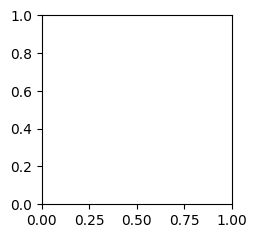

In [31]:
tfds.show_examples(train_data, ds_info)

In [ ]:
class_names = ds_info.features["label"].names
len(class_names)

## Exploring the Food101 data from TF Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (img tensors)
* Datatype of our input data
* What the labels look like

In [ ]:
train_one_sample = train_data.take(1)
import tensorflow as tf

In [ ]:
for image, label in train_one_sample:
    print(f"""
    IMG SHAPE: {image.shape}
    IMG DTYPE: {image.dtype}
    INT CLASS: {label},
    STR CLASS: {class_names[label]}
    """)

In [ ]:
tf.reduce_max(image), tf.reduce_min(image)

### Plot an image from TFDS

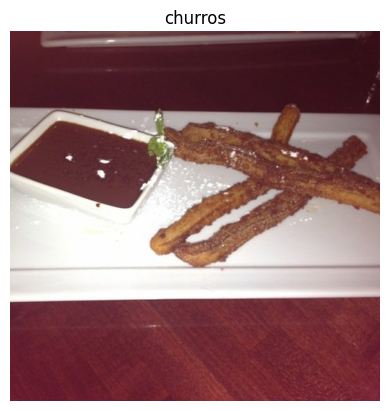

In [14]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label])
plt.axis(False);

## Create preprocessing functions for our data

In order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` dtype
* Comprised of all diff size tensors
* Not scaled (0<tensor<255)

What we know models like:
* Data in `float32` or mixed precision
* For batches, TF likes all of the tensors within a batch to be of the same size
* Scaled (0<tensor<1) (normalized)

Since we use EfficientBX pretrained model from tf.keras.applications we don't need to normalize data.

Our functions needs to:
1. Reshape our images to all the same size
2. Convert dtype from `uint8` to `float32`

In [15]:
# Make a func for preprocessing imgs
def preprocess_img(img, label, target_img_shape=224):
    """
    Converts img dtype from uint8 -> float32 and reshapes img to 
    (target_img_shape, target_img_shape, 3)
    """
    img = tf.image.resize(img, size=(target_img_shape, target_img_shape))
    return tf.cast(img, tf.float32), label # return (float_32_img, label) tuple

In [16]:
# Preprocess a single sample
preprocessed_img = preprocess_img(image, label)[0]

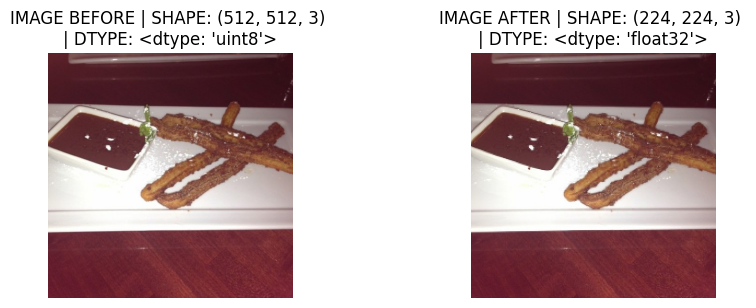

In [17]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1) 
plt.imshow(image)
plt.title(f"IMAGE BEFORE | SHAPE: {image.shape} \n| DTYPE: {image.dtype}")
plt.axis(False)
fig.add_subplot(2, 2, 2)
plt.imshow(preprocessed_img/255.)
plt.title(f"IMAGE AFTER | SHAPE: {preprocessed_img.shape} \n| DTYPE: {preprocessed_img.dtype}")
plt.axis(False);

## Batch & prepare datasets

We're now going to make our data inputs pipeline run really fast.

In [18]:
# Map preprocesiing function to training 
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing func to test_data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:
* TensorBoard
* ModelCheckpoint

In [20]:
# Import TensorBoard callback (from helper_functions)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback
checkpoint_path = "ckpt/checkpoint.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_acc",
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

## Setup mixed precision training

In [21]:
# Turn on mixed precision
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

In [22]:
policy

<FloatDTypePolicy "mixed_float16">

In [23]:
tf

<module 'tensorflow' from '/home/lolka0d/anaconda3/envs/jp-notebooks/lib/python3.11/site-packages/tensorflow/__init__.py'>

## Build feature extraction model

In [38]:
from tensorflow import keras
IMG_SHAPE = (224, 224)

# data_augmentation = keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomZoom(0.2, dtype="float32"),
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", dtype="float32"),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2, dtype="float32"),
#     tf.keras.layers.experimental.preprocessing.RandomHeight(0.2, dtype="float32"),
#     tf.keras.layers.experimental.preprocessing.RandomWidth(0.2, dtype="float32")
# ])

# Create a base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functiional model
inputs = keras.layers.Input(IMG_SHAPE + (3,))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(101,)(x)
outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32)(x)

model = tf.keras.Model(inputs, outputs)

In [39]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [40]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Checking layer dtype policies

In [41]:
# Check the dtype policy of layers
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_8 True float32 <FloatDTypePolicy "mixed_float16">
efficientnetb0 False float32 <FloatDTypePolicy "mixed_float16">
global_average_pooling2d_2 True float32 <FloatDTypePolicy "mixed_float16">
dense_2 True float32 <FloatDTypePolicy "mixed_float16">
activation True float32 <FloatDTypePolicy "float32">


Going through the above we see:
* `layer.name`: the human readeble name of a particular layer
* `layer.trainable`: is the layer trainable
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data policy a layer computes 

In [42]:
# Check base model layers
for layer in model.layers[1].layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_7 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_8 False float32 <FloatDTypePolicy "mixed_float16">
normalization_4 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_9 False float32 <FloatDTypePolicy "mixed_float16">
stem_conv_pad False float32 <FloatDTypePolicy "mixed_float16">
stem_conv False float32 <FloatDTypePolicy "mixed_float16">
stem_bn False float32 <FloatDTypePolicy "mixed_float16">
stem_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_dwconv False float32 <FloatDTypePolicy "mixed_float16">
block1a_bn False float32 <FloatDTypePolicy "mixed_float16">
block1a_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reshape False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reduce False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_expand False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_excite False float32 <FloatDTypeP

## Fit the feature extraction model

In [ ]:
history = model.fit(
    train_data,
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[create_tensorboard_callback("training", "efficient"), model_checkpoint]
)

Saving TensorBoard log files to: training/efficient/20240423-232732
Epoch 1/3
 204/2368 ━━━━━━━━━━━━━━━━━━━━ 2:17:25 4s/step - accuracy: 0.1655 - loss: 3.9379

In [ ]:
# Evaluate
results = model.evaluate(test_data)

In [ ]:
results

## Off to you..

In [20]:
import numpy as np

arr = np.zeros((5,5), dtype=np.int16)

In [22]:
for i in range(5):
    for j in range(5):
        arr[i][j] = int(input())

arr.T

 1
 1
 1
 1
 1
 2
 2
 2
 2
 2
 3
 3
 3
 3
 3
 4
 4
 4
 4
 4
 5
 5
 5
 5
 5


array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]], dtype=int16)

In [17]:
arr.dtype

dtype('float64')

In [23]:
import tensorflow as tf

2024-11-11 12:29:00.753674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 12:29:00.850125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 12:29:00.875113: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 12:29:01.054385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 12:29:02.708733: W tensorflow/compiler/tf2

I0000 00:00:1731320952.127290    3775 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731320952.319526    3775 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731320952.323140    3775 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731320952.494067    3775 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

'/device:GPU:0'